# Data Pipeline in Tensorflow

> In this post, it will introduce the usage of training and predict from keras models using using generators. A flexible and efficient data pipeline is one of the most essential parts of deep learning model development. In this week you will learn a powerful workflow for loading, processing, filtering and even augmenting data on the fly using tools from Keras and the tf.data module. This is the summary of lecture "Customizing your model with Tensorflow 2" from Coursera.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Deep_Learning, Tensorflow]
- image: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

plt.rcParams['figure.figsize'] = (16, 10)

In [2]:
print('Tensorflow: v' + tf.__version__)

Tensorflow: v2.3.1


## Keras datasets

### MNIST Dataset
```python
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

### CIFAR-10 Dataset
```python
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

### IMDB Dataset
```python
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000, max_len=100)
```

### Coding Tutorial

For a list of Keras datasets and documentation on recommended usage, see [this link](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

#### Load the CIFAR-100 Dataset

In [5]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 44s 0us/step


In [6]:
# Confirm that reloading the dataset does not require a download
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

#### Examine the Dataset

In [7]:
# Examine the shape of the data.
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [8]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


[41]


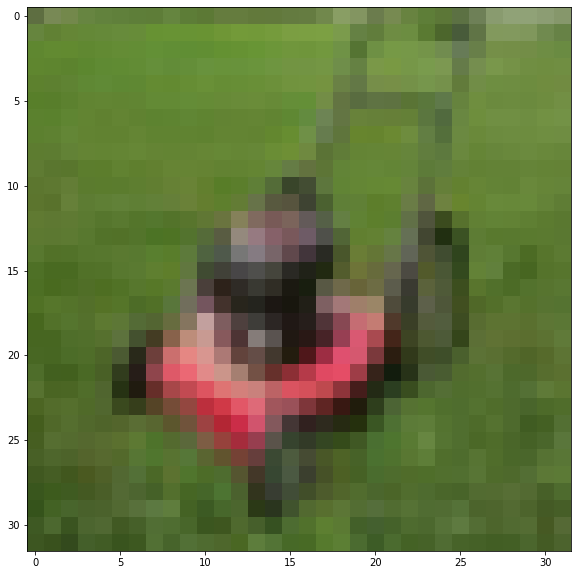

In [9]:
# Examine one of the images and is corresponding label
plt.imshow(X_train[500])
print(y_train[500])
plt.show()

In [10]:
# Load the list of labels from a JSON file
import json

with open('./dataset/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [11]:
# Print a few of the labels
cifar100_fine_labels[:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [13]:
# Print the corresponding label for the example above
cifar100_fine_labels[41]

'lawn_mower'

#### Load the data using different label modes

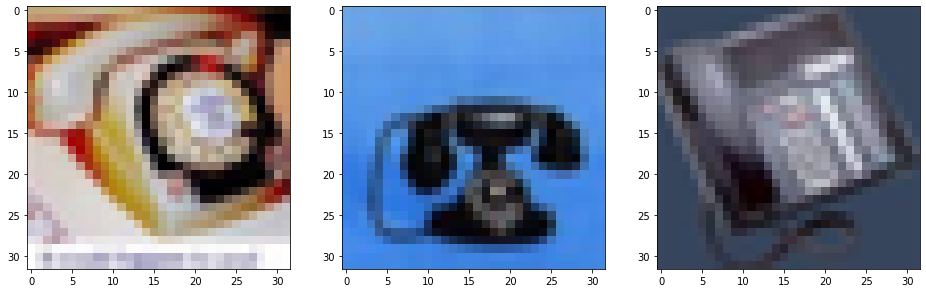

In [15]:
# Display a few examples from category 87 (index 86) and the list of labels
examples = X_train[(y_train.T == 86)[0]][:3]

fix, ax = plt.subplots(1, 3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])
plt.show()

In [16]:
# Reload the data using the coarse label mode
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='coarse')

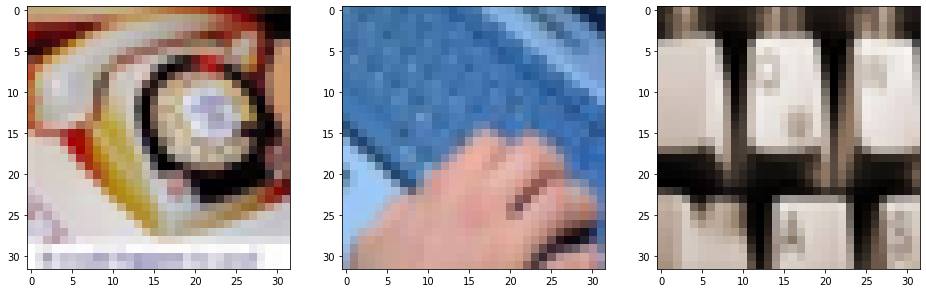

In [17]:
# Display a few examples from category 6 (index 5) and the list of labels
examples = X_train[(y_train.T == 5)[0]][:3]

fix, ax = plt.subplots(1, 3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])
plt.show()

In [18]:
# Load the list of coarse labels from a JSON file
with open('dataset/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [19]:
# Print a few of the labels
cifar100_coarse_labels[:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [22]:
# Print the corressponding labels for the examples above
print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

telephone
household electrical device


#### Load the IMDB Dataset

In [23]:
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [24]:
# Print an example from the training dataset, along with its corressponding label
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [25]:
# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in X_train]

In [26]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [36]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 
(X_train, y_train), (X_test, y_test) = imdb.load_data(skip_top=50, oov_char=2)

In [37]:
# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in X_train]

In [38]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [39]:
# Define the functions for filtering the sequences
def remove_oov_char(element):
    """ Filter function for removing the oov_char """
    return [word for word in element if word != 2]

def filter_list(lst):
    """ Run remove_oov_char on elements in a list """
    return [remove_oov_char(element) for element in lst]

In [40]:
# Remove the oov_char from the sequences using the filter_list function
X_train = filter_list(X_train)

In [41]:
# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in X_train]

# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


## Dataset Generators

All of the datasets that we can load in using the Keras API can comfortably fit into memory. That's great because it makes it really easy to work with them, but in practice datasets are often a lot bigger and won't fit into memory. One way to handle this is to use detaset generators. This is a way to feed data into model without loading it all up in your memory at once. If you've ever come across Python generators before, this idea might already be familiar to you. A generator in Python is a function that returns an object that you can iterate over, and it yields a series of values, but it doesn't store all those value in memory. Instead, it saves its own internal state, and each time we iterate the generator, it yields the next value in the series. So as you might have guessed, in this way, we can use generators to feed data into our model when the data doesn't fit into memory. 

### Example 1
```python
def text_file_reader(filepath):
    with open(filepath, 'r') as f:
        for row in f:
            yield row
            
text_datagen = text_file_reader('data_file.txt')

next(text_datagen)
next(text_datagen)
```

### Example 2
```python
def get_data(batch_size):
    